<a href="https://colab.research.google.com/github/Goodone11/spam-detection/blob/main/Usingtoken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code aims to explore the use of tokens for spam detection. It leverages the Natural Language Toolkit (nltk) in Python to label emails as either spam or non-spam (ham) based on the presence of specific keywords.

Download the required dataset for the word_tokenize function to function properly. This tokenizer from the nltk library splits text into individual words (tokens). A predefined list of keywords associated with spam is used, and the function checks if any of these words appear in the text, labeling the email as spam accordingly.

Balancing the Dataset By using SMOTE, the model is trained on a more balanced dataset, improving its ability to detect both "Ham" and "Spam" emails effectively.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("venky73/spam-mails-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.86M/1.86M [00:00<00:00, 2.40MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/venky73/spam-mails-dataset/versions/1


In [2]:
import os
print(os.listdir(path))

['spam_ham_dataset.csv']


In [3]:
import pandas as pd

# Read CSV file
file_path = os.path.join(path, "spam_ham_dataset.csv")
df = pd.read_csv(file_path)

print("Data preview:")
print(df.head())

Data preview:
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [4]:

import os
import pandas as pd
import numpy as np
from IPython.display import display

# Set display options to show more rows and wider columns
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_colwidth", 100)

# Define the file path and load the data
file_path = os.path.join(path, "spam_ham_dataset.csv")
emails = pd.read_csv(file_path)

# Print dataset dimensions and preview the first few rows
print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
display(emails.head())  # Directly using

Successfully loaded 5171 rows and 4 columns!


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on mond...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 ...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - -...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap . main trending\r\nabasements darer prudently fort...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is to book the teco pvr revenue . it is my understandi...,0


In [5]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

spam_keywords = ['free', 'win', 'winner', 'claim', 'click', 'offer', 'money', 'buy now', 'urgent', 'limited']

def label_email(content):
  tokens = word_tokenize(content.lower())
  if any(keyword in tokens for keyword in spam_keywords):
      return 1  # Spam
  else:
      return 0  # Ham

emails['label'] = emails['text'].apply(label_email)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


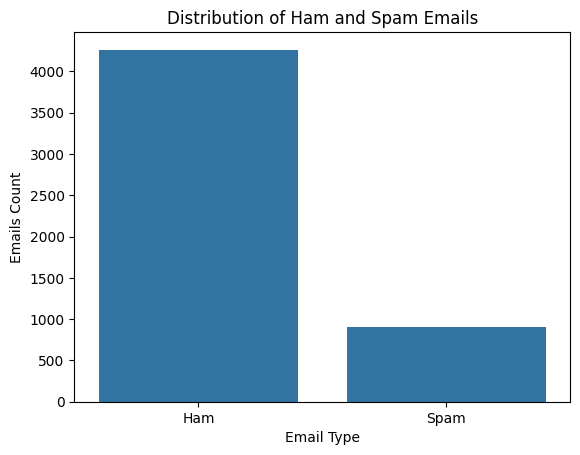

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution
sns.countplot(x='label', data=emails)
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title("Distribution of Ham and Spam Emails")
plt.xlabel("Email Type")
plt.ylabel("Emails Count")
plt.show()

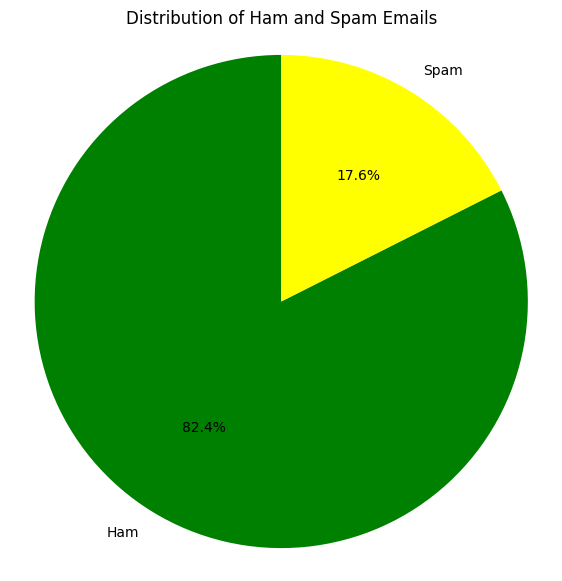

In [8]:
import matplotlib.pyplot as plt

# Count the number of Ham and Spam emails
ham_count = emails[emails['label'] == 0].shape[0]
spam_count = emails[emails['label'] == 1].shape[0]

# Data for the pie chart
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
colors = ['green', 'yellow']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Ham and Spam Emails")
plt.axis('equal')
plt.show()

In [9]:
# Calculate frequency and percentage for Ham
ham_count = emails['label'].value_counts()[0]
ham_percentage = emails['label'].value_counts(normalize=True)[0] * 100
print(f"Ham Emails - Frequency: {ham_count}, Percentage: {ham_percentage:.2f}%")

# Calculate frequency and percentage for Spam
spam_count = emails['label'].value_counts()[1]
spam_percentage = emails['label'].value_counts(normalize=True)[1] * 100
print(f"Spam Emails - Frequency: {spam_count}, Percentage: {spam_percentage:.2f}%")

Ham Emails - Frequency: 4263, Percentage: 82.44%
Spam Emails - Frequency: 908, Percentage: 17.56%


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [11]:
from imblearn.over_sampling import SMOTE

def preprocess_text(content):
    tokens = word_tokenize(content.lower())  # Tokenize and convert to lowercase
    return ' '.join(tokens)

emails['processed_text'] = emails['text'].apply(preprocess_text)

# Separate features and target
X = emails['processed_text']  # Feature: email text
y = emails['label']  # Target: Ham or Spam label

# Convert text data to numerical features (TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)  # This will be a sparse matrix

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)

# Ensure y is a 1D array and not a DataFrame
y = y.values

# Resample the features and target
X_res, y_res = smote.fit_resample(X_tfidf, y)


X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Now you can train the model on the balanced dataset



In [12]:
print("\nBalanced class distribution after SMOTE:")
print(pd.Series(y_res).value_counts())


Balanced class distribution after SMOTE:
0    4263
1    4263
Name: count, dtype: int64


In [13]:

# Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_res, y_res)

# Support Vector Machine (SVM) Model
svm_model = SVC(random_state=42)
svm_model.fit(X_res, y_res)

# Make predictions
lr_predictions = lr_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Evaluate and print classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))

print("\nSupport Vector Machine Classification Report:")
print(classification_report(y_test, svm_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       870
           1       0.96      0.99      0.97       836

    accuracy                           0.97      1706
   macro avg       0.97      0.98      0.97      1706
weighted avg       0.98      0.97      0.97      1706


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      1.00      1.00       836

    accuracy                           1.00      1706
   macro avg       1.00      1.00      1.00      1706
weighted avg       1.00      1.00      1.00      1706



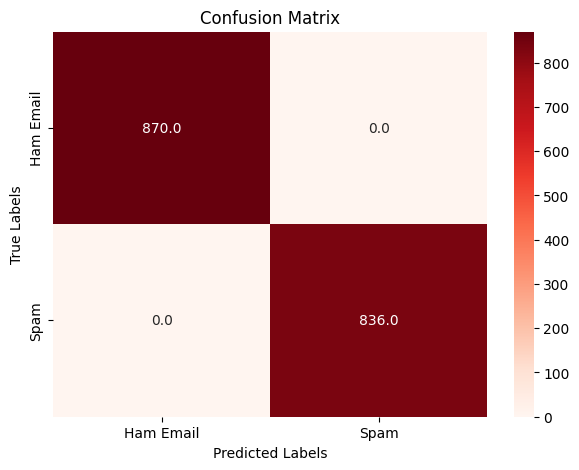

In [18]:
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
labels = ['Ham Email', 'Spam']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, fmt='.1f', cmap="Reds" , ax=ax);

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

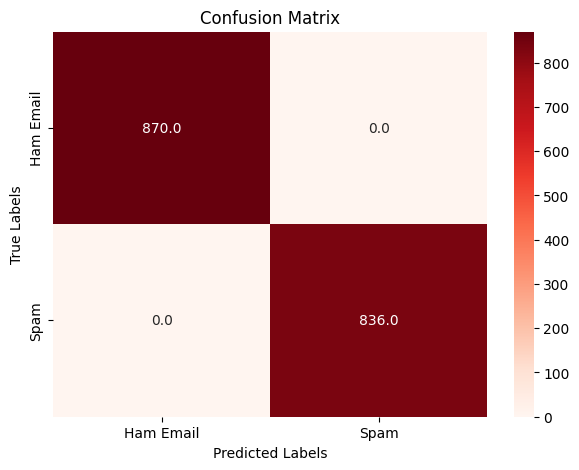

In [17]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)


labels = ['Ham Email', 'Spam']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, fmt='.1f', cmap="Reds" , ax=ax);

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier()
rf_model.fit(X_res, y_res)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Random Forest Classifier:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       870
           1       1.00      1.00      1.00       836

    accuracy                           1.00      1706
   macro avg       1.00      1.00      1.00      1706
weighted avg       1.00      1.00      1.00      1706



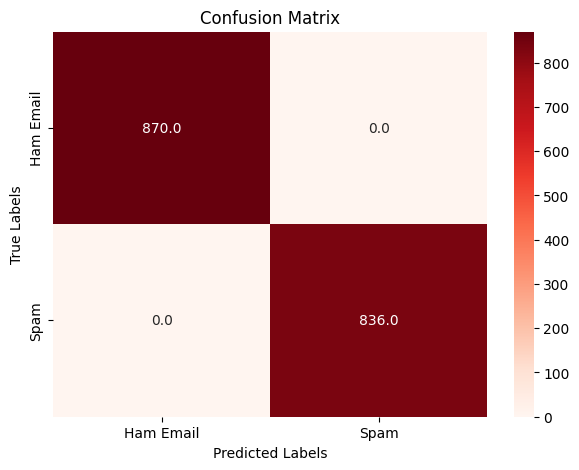

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['Ham Email', 'Spam']
plt.figure(figsize=(7,5))
ax= plt.subplot()
sns.heatmap(conf_matrix,annot=True, fmt='.1f', cmap="Reds" , ax=ax);

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()